**Numeric Simulation of Laser around the Threshold**

- author: Longfei Fan
- date: 05/05/2017

**Abstract**

In this note, I study some properties of laser around the threshold, including photon statistics, von Neumann entorpy, and the second order coherence. First, three numeric examples are given for lasers operated $20\%$ above the threshold, at the threshold, and $20\%$ below the threshold. I show how do their properties changes with repesct to time. Then I show that phase transition happens around the threshold by plot the values of average photon numbers, von Neumann entorpy, and the second oder coherent for a steady laser state.

In [181]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from scipy.stats import poisson

from qutip import *
import laser

%matplotlib inline
%reload_ext autoreload
%autoreload 1
%aimport laser

In [75]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')

# Theoretical Analysis


**Equation of Motion for the Density Matrix of the Cavity Field**

For the density of the cavity field $\rho_{nm}$, we have differential equations given by

$$
\begin{aligned}
\dot{\rho}_{nm} =
&- \frac{M_{nm}A}{1 + N_{nm}B/A} \rho_{nm} + \frac{\sqrt{nm}A}{1 + N_{n-1,m-1}B/A} \rho_{n-1,m-1} \\
&- \frac{C}{2}(n+m)\rho_{nm} + C\sqrt{(n+1)(m+1)} \rho_{n+1, m+1}
\end{aligned}
$$

where
$$
\begin{aligned}
A &= \frac{2r_a g^2}{\gamma^2},\\
B &= \frac{4g^2}{\gamma^2} A,\\
M_{nm} &= \frac{1}{2}(n+m+2) + (n-m)^2\frac{B}{8A},\\
N_{nm} &= \frac{1}{2}(n+m+2) + (n-m)^2\frac{B}{16A}.
\end{aligned}
$$

**Equations for diagonal terms**

It's seen that only diagonal terms are coupled together. Therefore we would have several groups of equations which are decoupled from each other. In particular, for the main diagonal elements, the group of euqations we have are given by

$$
\begin{aligned}
\dot{p}(n) =
&- \frac{(n+1)A}{1 + (n+1)B/A} p(n) + \frac{nA}{1 + nB/A} p(n-1) \\
&- Cnp(n) + C(n+1)p(n+1)
\end{aligned}
$$

If the cavity state starts from a vaccum state, only $\rho_{00}~(p_0)$ is non-zero at the very beginning. Only main diagonal terms are coupled with $\rho_{00}$, so only main diagonal terms will become non-zero during evolution. Other offset diagonal terms will keep zero during the evolution. So we can get the whole density matrix by just solving the main diagonal terms.

# Numeric Simulation

**Tuning Paramters**

The average photon number for laser operated above the threshold is given by

$$
\bar{n} = \frac{A}{C} \frac{A - C}{B} = \frac{A}{C} \frac{A - C}{4g^2A/\gamma^2} = (\alpha - 1) \frac{\gamma^2}{4 g^2}
$$

The ratio is given by

$$
\alpha = \frac{A}{C} = \frac{r_a}{2C} \frac{4g^2}{\gamma^2}
$$

Recall that the effective pumping rate is defined by

$$
r_a = \frac{\gamma \lambda}{\gamma + \lambda} = \frac{\gamma}{1 + \lambda / \gamma}
$$

As both $\gamma$ and $\lambda$ are positve but smaller than one, $r_a$ also falls within $0$ and $1$.

**Parameters Used for the Atom and Cavity**
There are a few parameters to be considered for this problem, we have to make something fixed. Here I make the average photon numbers $\bar{n} = 50$, and the cavity damping rate $C = 0.0001$. Then I can study how entropy evoloves given the fixed steady average photon numbers with respect to differnet A/C ratios.

**Initial States**

- cavity: vaccum state $\lvert 0 \rangle$
- atom: ground state $\lvert g \rangle$

**Additional Considerations on Chosen of Parameters**

As $r_a = 2C \alpha \gamma^2 / 4g^2 = 2C \bar{n} \alpha / (1 - \alpha) < 1$, we have $\alpha > 1 / (1 - 2 C \bar{n})$. Then $2 C \bar{n}$ cannot be too large, if we want to explore $\alpha$ which is close to $1$. For parameters given above $\alpha > 1 + 0.01$, then we the minimum $\alpha$ we can choose is $1.01$.

In [ ]:
def get_para(alpha, nbar, kappa=0.0001, g=0.001):
    gamma = np.sqrt(nbar / (alpha - 1)) * 2 * g
    ra = 2 * kappa * nbar * alpha / (alpha - 1)
    return {'g': g, 'gamma': gamma, 'C': kappa, 'ra': ra,
            'A': 2 * ra * g**2 / gamma**2, 'B': 8 * ra * g**4 / gamma**4}

In [244]:
G = 0.001
KAPPA = 0.0001
NBAR = 200

# initial cavity state
N_max = 1000
n_list = np.arange(N_max)
init_psi = fock(N_max, 0)

In [245]:
# from scipy.stats import poisson
# nbar = NBAR
# pns = [poisson.pmf(n, nbar) for n in n_list]
# entr_cohe = - sum([pn * np.log(pn) for pn in pns if pn > 0])
# entr_cohe

In [297]:
n_dict['gt']

array([    0.,    14.,    28.,    42.,    56.,    70.,    84.,    98.,
         112.,   126.,   140.,   154.,   168.,   182.,   196.,   210.,
         224.,   238.,   252.,   266.,   280.,   294.,   308.,   322.,
         336.,   350.,   364.,   378.,   392.,   406.,   420.,   434.,
         448.,   462.,   476.,   490.,   504.,   518.,   532.,   546.,
         560.,   574.,   588.,   602.,   616.,   630.,   644.,   658.,
         672.,   686.,   700.,   714.,   728.,   742.,   756.,   770.,
         784.,   798.,   812.,   826.,   840.,   854.,   868.,   882.,
         896.,   910.,   924.,   938.,   952.,   966.,   980.,   994.,
        1008.,  1022.,  1036.,  1050.,  1064.,  1078.,  1092.,  1106.,
        1120.,  1134.,  1148.,  1162.,  1176.,  1190.,  1204.,  1218.,
        1232.,  1246.,  1260.,  1274.,  1288.,  1302.,  1316.,  1330.,
        1344.,  1358.,  1372.,  1386.,  1400.])

In [300]:
t_list = np.linspace(0, 800000, 1001)
step = round(len(t_list) / 100)
n_dict = {'gt': t_list[::step] * G}
entr_dict = {'gt': t_list[::step] * G}

In [301]:
alphas = (1.02, 1.06, 1.1, 1.2, 1.4, 2.0, 4.0, 8.0, 16.0)

for alpha in alphas:
    paras = get_para(alpha, NBAR)
    g, ra, gamma, kappa = G, paras['ra'], paras['gamma'], KAPPA
        
    l = laser.LaserOneMode(g, ra, gamma, kappa)
    print(l.get_abc())
    print(l.nbar_above_approx())
    
    l.pn_evolve(init_psi, N_max, t_list)
    print(l.nbar_numeric())
    
    key = '{:4.2f}'.format(alpha)
    n_dict[key] = l.get_ns()
    entr_dict[key] = l.get_entrs()
#     l.plot_entropy_vs_time()

{'A': 0.00010199999999999999, 'B': 1.0200000000000005e-08, 'C': 0.0001}
200.0
(0.999999999997911, 112.52932644304461)
{'A': 0.00010599999999999999, 'B': 3.180000000000002e-08, 'C': 0.0001}
200.0
(0.99999999999656219, 168.74969593031275)
{'A': 0.00011, 'B': 5.5000000000000043e-08, 'C': 0.0001}
200.0
(1.0000000000001608, 193.27477082502733)
{'A': 0.00011999999999999999, 'B': 1.1999999999999994e-07, 'C': 0.0001}
200.0
(1.0000000000115277, 199.95837857540371)
{'A': 0.00014000000000000001, 'B': 2.8000000000000002e-07, 'C': 0.0001}
200.0
(0.99999999999954414, 199.99997247654298)
{'A': 0.00019999999999999998, 'B': 9.9999999999999995e-07, 'C': 0.0001}
200.0
(1.0000000000004432, 200.00000003652758)
{'A': 0.00039999999999999991, 'B': 5.9999999999999968e-06, 'C': 0.0001}
200.0
(1.0000000000031857, 200.00000039356325)
{'A': 0.00079999999999999993, 'B': 2.7999999999999996e-05, 'C': 0.0001}
200.0
(1.0000000000017188, 200.00000049099097)
{'A': 0.0015999999999999994, 'B': 0.00011999999999999992, 'C': 

In [302]:
n_dict.keys()

dict_keys(['gt', '1.02', '1.06', '1.10', '1.20', '1.40', '2.00', '4.00', '8.00', '16.00'])

In [306]:
n_df = pd.DataFrame(n_dict, columns=n_dict.keys() )
entr_df = pd.DataFrame(entr_dict, columns=entr_dict.keys())

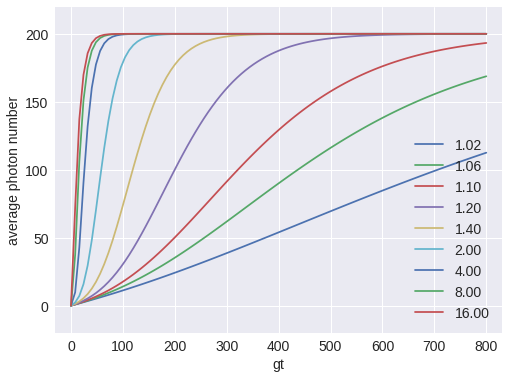

In [307]:
n_df.plot(x='gt', xlim=(-30, 830), ylim=(-20, 220), 
             figsize=(8, 6), fontsize=14)
plt.ylabel('average photon number', fontsize=14)
plt.xlabel('gt', fontsize=14)
plt.legend(fontsize=14);

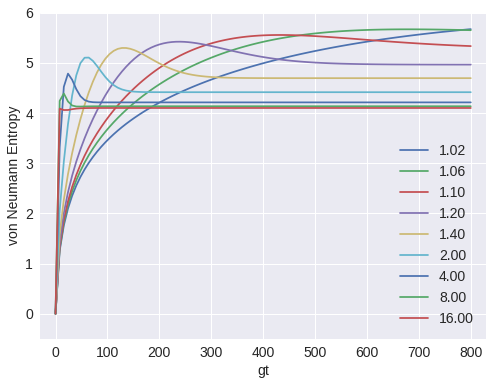

In [309]:
entr_df.plot(x='gt', xlim=(-30,830), ylim=(-0.5, 6), 
             figsize=(8, 6), fontsize=14)
plt.ylabel('von Neumann Entropy', fontsize=14)
plt.xlabel('gt', fontsize=14)
plt.legend(fontsize=14);

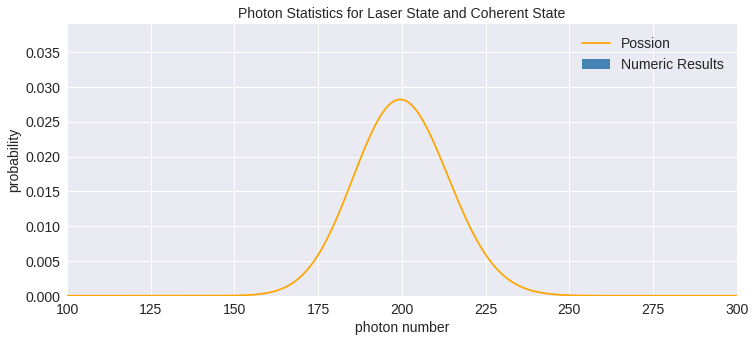

In [98]:
# make a comparison between a laser state and a coherent state
# with the same average photon numbers
# operated above the threshold by 20%
fig, ax = plt.subplots(figsize=(12, 5))
ax.bar(n_listp, lp.get_pns()[-1], width=0.3, 
        color="steelblue", label="Numeric Results")
ax.plot(n_listp, poisson.pmf(n_listp, lp_avern), 
        color="orange", label="Possion")
ax.set_title("Photon Statistics for Laser State and Coherent State", 
             fontsize=14)
ax.set_xlabel("photon number", fontsize=14)
ax.set_ylabel("probability", fontsize=14)
ax.legend(fontsize=14)
ax.set_xlim(100, 300)
ax.tick_params(axis='both', which='major', labelsize=14);

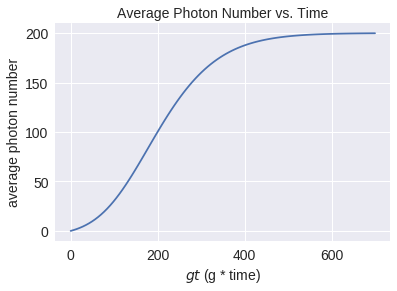

In [38]:
# plot average photon numbers vs. time
lp.plot_n_vs_time();

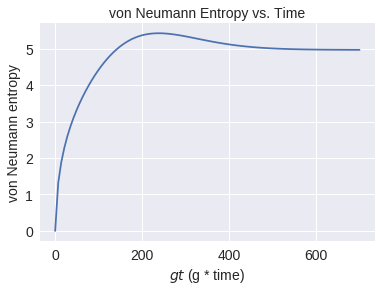

In [39]:
# plot entroy vs. time
lp.plot_entropy_vs_time();

## 4. Steady values around the threshold

In [196]:
# parameters
g = 0.001
gamma = np.sqrt(4000) * g
kappa = 0.0001

# initial cavity state
N_max = 2000
n_list = np.arange(N_max)
init_psi = fock(N_max, 0)

In [213]:
ratios, ns, entrs, g2s = [], [], [], []
a = destroy(N_max)

for ra in np.arange(0.005, 0.4, 0.005):
    l = laser.LaserOneMode(g, ra, gamma, kappa) # create laser object
    l.set_N_max(N_max)
    
    pn, n, entr = l.solve_steady_state()
    rho = Qobj(np.diag(pn))
    g2 = expect(a.dag() * a.dag() * a * a, rho) / n**2
    
    ratios.append(2 * ra * g**2 / gamma**2 / kappa)
    ns.append(n)
    entrs.append(entr)
    g2s.append(g2)

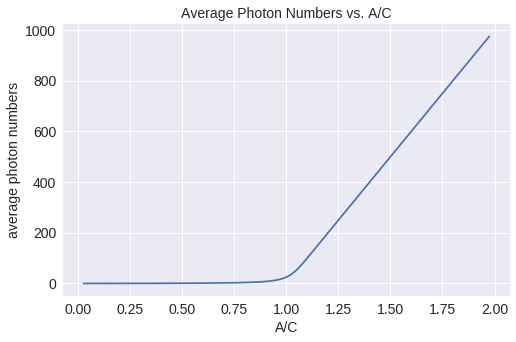

In [214]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(ratios, ns)
ax.set_title("Average Photon Numbers vs. A/C", fontsize=14)
ax.set_xlabel("A/C", fontsize=14)
ax.set_ylabel("average photon numbers", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14);

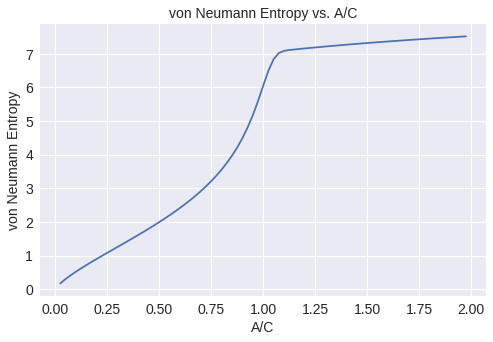

In [215]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(ratios, entrs)
ax.set_title("von Neumann Entropy vs. A/C", fontsize=14)
ax.set_xlabel("A/C", fontsize=14)
ax.set_ylabel("von Neumann Entropy", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14);

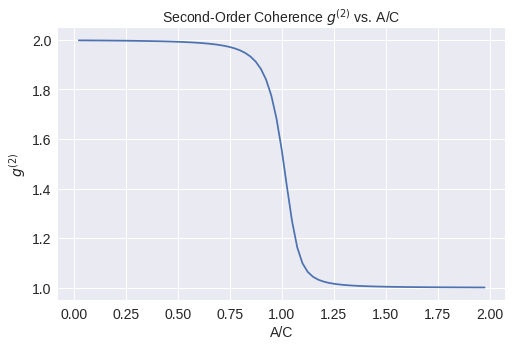

In [216]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(ratios, g2s)
ax.set_title("Second-Order Coherence $g^{(2)}$ vs. A/C", fontsize=14)
ax.set_xlabel("A/C", fontsize=14)
ax.set_ylabel("$g^{(2)}$", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14);